# Vehicle-Price-PredictorOnCarDekho

## Introduction
**The objective of this kernel is to use an example of vehicles and help reach a good r2 score using basic regression model upon various Data.viz techniques.**

**Hence,for instance, we get data from the car website CarDekho.com, filled with information on a wide variety of cars, including their selling price and present price. We realize that we can use this data to make sure we get a good deal on a new car. In particular, we can figure out exactly how much one should pay for a specific type of car. 
Now Comes the Linear Regression to our rescue!**

**Linear Regression is a method for discovering the relationship between two variables in the dataset, such as price of the car and the year it was made. Data Scientists rely on this method for solving a wide range of problems, especially when it comes to prediction.**

1. I have used a simplified Linear Regression model with sufficient data analysis and feature engineering to reach the desired r2 score of [.831].
2. Do keep monitoring this kernel for future versions,improvements and to check the implementation of some newer and advanced regression models !
3. Do UpVote the Notebook if you find it helpful !

## About the dataset
**This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset is as follows:**
* Car_Name
* Year
* Selling_Price
* Present_Price
* Kms_Driven
* Fuel_Type
* Seller_Type
* Transmission
* Owner

## Imports


1. Let's get our environment ready with the libraries we'll need and then import the relevant ones beforehand!
2. Pandas is one of the most widely used python libraries in data science. It provides high-performance, easy to use structures and data analysis tools.
3. Matplotlib is a plotting library for the Python programming language
4. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Fetching the Data
**Using Pandas to load the dataset into this notebook. Using pandas we can read our datafile (car data.csv) with the line below. Data-set loaded will be assigned to the variable vehicles.**

In [5]:
#load dataset and assign it to a variable
vehicles=pd.read_csv("car data.csv")

## Check out the Data
**We will run some exploratory analysis on our cardekho dataset now that it is loaded in the vehicles variable.We would check for the shape of the dataset, any missing or null values and will try to find out the correlation amongst the dataset features.
Let's Begin!**

In [6]:
#use the 'head' method to show the first five rows of the table as well as their names. 
vehicles.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Looking at the above 5 rows of data we need to develop an understanding of every column to efficiently continue exploring the dataset further.
We need to have a clear understanding of every feature defined in the data-set and what it is trying to convey!**

In [7]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Above is a concise summary of our dataframe printing columns' data-type,index data-type and number of non-null values !**

In [8]:
vehicles.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Looking at the result of the above query it seems clear we have no missing/null values in our dataset!**

In [9]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**We have a beautiful analysis of our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. Helps in scaling!**

## Exploratory Data Analysis(EDA)
Let's create some simple plots to check out the data!

**Visualizing the categorical data :**
## 1. Owner Type
Let's examine the selling price based on the type of owner

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

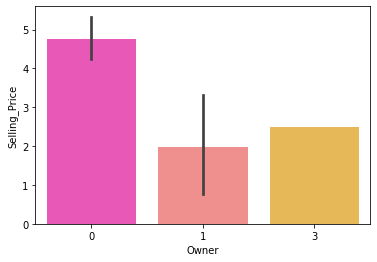

In [10]:
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

**It seems that the vehicles belonging to owner 0 have the highest selling price**

## 2. Transmission Type
Let's examine the selling price for manual and automatic vehicles! 

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

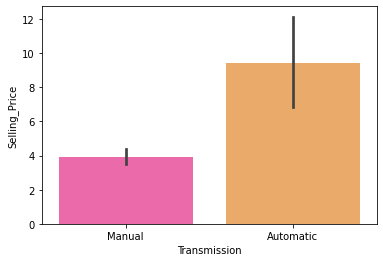

In [11]:
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')

**We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.**

## 3. Fuel Type
Let's examine the selling price based on different types of engine fuel!

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

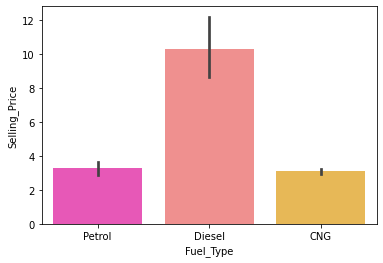

In [12]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=vehicles,palette='spring')

**Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles**

## 4. Seller Type
Let's get an idea of the selling price for a vehicle sold by a Dealer vs Individual!

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

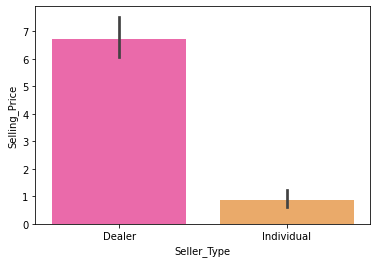

In [13]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=vehicles,palette='spring')

**Dealers can sell vehicles at a higher selling price than a general individual. No surprises at all !**

**Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :**
## 1. Kms Driven

<Figure size 720x720 with 0 Axes>

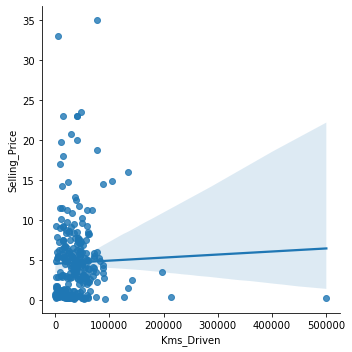

In [14]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

**The selling price is found to be higher for vehicles with less kms covered under the belt!**

## 2. Present Price

<Figure size 720x720 with 0 Axes>

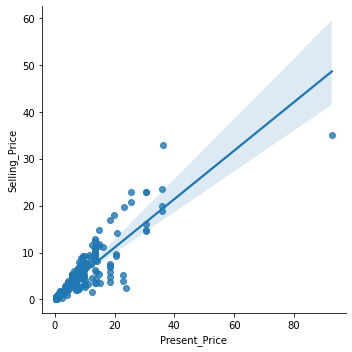

In [15]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

**Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.**

## 3. Vehicle Age

In [16]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
vehicles['Vehicle_Age']=2020- vehicles['Year']

#check out the newly added column
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


<AxesSubplot:xlabel='Vehicle_Age', ylabel='Selling_Price'>

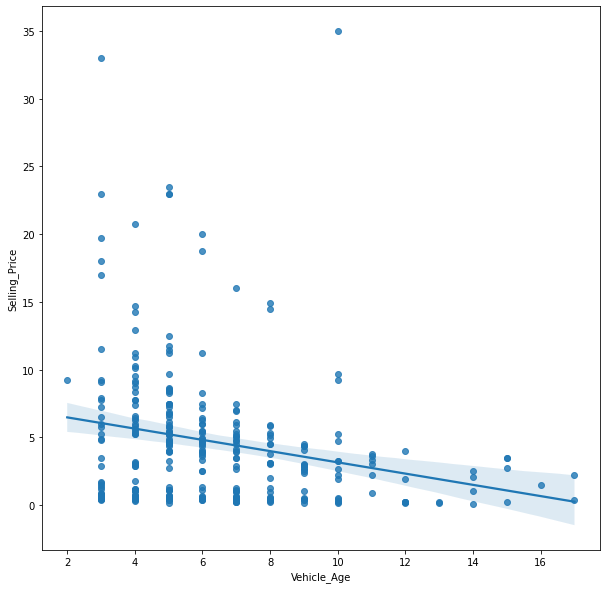

In [17]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

**It seems the selling price decreases overall for older/ageing vehicles!**

## Feature Engineering
We shall convert categorical features to numeric type!

In [18]:
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year'],inplace=True)

#check out the dataset with new changes
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,6,0,1,1,0
1,sx4,4.75,9.54,43000,0,7,1,0,1,0
2,ciaz,7.25,9.85,6900,0,3,0,1,1,0
3,wagon r,2.85,4.15,5200,0,9,0,1,1,0
4,swift,4.60,6.87,42450,0,6,1,0,1,0


* Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.
* Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
* Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer  and '0' Seller_Type_Individual.


## Understanding and Visualizing Correlations amongst the features

In [ ]:
sns.pairplot(vehicles)

* The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features. 
* Selling price seems to be considerably correlated with the Present Price feature.

## Correlation HeatMap

In [ ]:
correlations = vehicles.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")


# Training our Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an vehicles_train array that contains the part of dataset used for training data, and a vehicles_test array used for test data.

## 1. Train Test Split

In [ ]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

np.random.seed(0)
vehicles_train,vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=100)

# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#features we need to scale are assigned as a list.
var=['Selling_Price','Present_Price','Kms_Driven','Vehicle_Age']

#scaling the training data(fitting the parameters and transforming the values)
vehicles_train[var]=scaler.fit_transform(vehicles_train[var])

#transforming the test data.We avoid fitting the values to prevent data leakage!
vehicles_test[var]=scaler.transform(vehicles_test[var])

#We will toss out the Car_Name column from training and test data because it only has text info that the linear regression model can't use!

X_test=vehicles_test.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_test=vehicles_test['Selling_Price']

X_train=vehicles_train.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_train=vehicles_train['Selling_Price']

## 2. Creating and Training the Model

- Using Linear Regression Method

In [ ]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

## 3. Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.[](http://)

In [ ]:
# print the intercept of best-fit line
print(lm.intercept_)

In [ ]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=vehicles.drop(columns=['Car_Name','Selling_Price'])

coeff_df = pd.DataFrame(lm.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

### Interpreting the coefficients:

**For numerical features:**
* Holding all other features fixed, a 1 unit increase in Present_Price is associated with an increase of 0.742.
* Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .0411.
* Holding all other features fixed, a 1 unit increase in Vehicle_Age means decrease in 0.22764.

## 4. Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [ ]:
predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

**Residual Histogram**

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)           

## 5. Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
R2 = metrics.r2_score(y_test,predictions)
R2

## 6. Conclusions

* Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.
* Resale value of Automatic vehicle is more than that of a Manual vehicle.
* Car age is effecting negatively as the Selling Price decreases for an older car.
* Resale value of cars with Fuel type Diesel is higher.


# Thank You

* This is my first Kaggle Notebook. Please do point out any irregularities if found ! 
* Don't forget to leave your valuable feedback in the comments below.Thank You!